# A U-Net for Drosophila wing segmentation

### Dealing with images

In [3]:
from PIL import Image
import numpy as np

def tif2array(image_path):
    ## Imports an arbitrary .tif image and creates a numpy array with the pixel-values
    im = Image.open(image_path)
    return np.array(im.getdata()).reshape(im.size[::-1])
    
def load_ground_truth(image_path = "./data/groundTruth.tif"):
    ## Imports a .tif image with the ground truth (drosophila wing) 
    ## and creates a numpy array with the pixel-values
    
    im = Image.open(image_path)
    return np.array(im.getdata()).reshape(im.size[::-1])
    
def load_raw_data(image_path = "./data/rawData.tif"):
    ## Imports a .tif image with the raw data (drosophila wing)
    ## and creates a numpy array with the pixel-values
    im = Image.open(image_path)
    return np.array(im.getdata()).reshape(im.size[::-1])
    
def load_crop(image_path="./data/rawData.tif", origin=(400,400), length=100, width=100):
    ## Imports an arbitrary .tif image region
    ## and creates a numpy array with the pixel-values

    im = Image.open(image_path)
    return np.array(im.getdata()).reshape(im.size[::-1])[origin[0]:origin[0]+length,origin[1]:origin[1]+width]

In [56]:
import numpy as np
import matplotlib.pyplot as plt
#plt.ioff()


def plot_some(X_list, title_list=None, **imshow_kwargs):
    """
    plots a matrix of images

    X_list = [ X_1, X_2, ..., X_n]

    where each X_i is a list of images


    """
    h = len(X_list)
    w = len(X_list[0])
    plt.gcf()
    for i in range(h):
        for j in range(w):
            plt.subplot(h, w, i * w + j + 1)
            try:
                plt.title(title_list[i][j], fontsize=8)
            except:
                pass
            plt.imshow(np.squeeze(X_list[i][j]),**imshow_kwargs)
            plt.axis("off")

(6, 1)


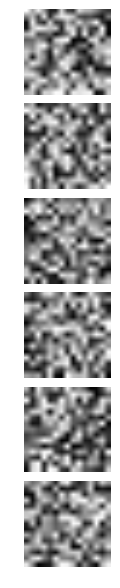

In [4]:
# plotting
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

def plot_patches(patches=[], dims=(1,1)):
    plotsInX = dims[0]
    plotsInY = dims[1]
    
    fig, ax = plt.subplots(plotsInX, plotsInY)
    if (ax.ndim == 1):
        ax = np.reshape(ax, (dims[0], dims[1]))
  
    print ax.shape
    for i in range(plotsInX):
        for j in range(plotsInY):
            ax[i,j].axis('off')
            ax[i,j].imshow(patches[j + i*plotsInY], cmap="gray")
            
    fig.subplots_adjust(hspace=0.1)
    fig.subplots_adjust(wspace=0.1)
#     fig.tight_layout()
    plt.show()
    
    
patches = []    
for i in range(6):
    patches.append(np.random.rand(15,15))   
    
    
plot_patches(patches=patches, dims=(6,1))


In [5]:
    raw_data = '/Users/dibrov/Documents/python/runforest/FlyWingData/rawData.tif'
    ground_truth = '/Users/dibrov/Documents/python/runforest/FlyWingData/groundTruth.tif'

    # length and width of the patch
    L = 100
    W = 100

    # trainig set: nine pathces
    p1 = load_crop(origin=(400,400), length=L, width=W)
    p2 = load_crop(origin=(864,3032), length=L, width=W)
    p3 = load_crop(origin=(1056,1038), length=L, width=W)
    p4 = load_crop(origin=(1278,2601), length=L, width=W)
    p5 = load_crop(origin=(912,2157), length=L, width=W)
    p6 = load_crop(origin=(1143,1911), length=L, width=W)
    p7 = load_crop(origin=(741,387), length=L, width=W)
    p8 = load_crop(origin=(1548,1281), length=L, width=W)
    p9 = load_crop(origin=(459,3363), length=L, width=W)

    # three more patches

    p10 = load_crop(origin=(727,2262), length=L, width=W)
    p11 = load_crop(origin=(944,555), length=L, width=W)
    p12 = load_crop(origin=(487,660), length=L, width=W)

    # trainig set labels
    la1_sq = load_crop(image_path=ground_truth, origin=(400,400), length=L, width=W)
    la2_sq = load_crop(image_path=ground_truth, origin=(864,3032), length=L, width=W)
    la3_sq = load_crop(image_path=ground_truth, origin=(1056,1038), length=L, width=W)
    la4_sq = load_crop(image_path=ground_truth, origin=(1278,2601), length=L, width=W)
    la5_sq = load_crop(image_path=ground_truth, origin=(912,2157), length=L, width=W)
    la6_sq = load_crop(image_path=ground_truth, origin=(1143,1911), length=L, width=W)
    la7_sq = load_crop(image_path=ground_truth, origin=(741,387), length=L, width=W)
    la8_sq = load_crop(image_path=ground_truth, origin=(1548,1281), length=L, width=W)
    la9_sq = load_crop(image_path=ground_truth, origin=(459,3363), length=L, width=W)

    la10_sq = load_crop(image_path=ground_truth, origin=(727,2262), length=L, width=W)
    la11_sq = load_crop(image_path=ground_truth, origin=(944,555), length=L, width=W)
    la12_sq = load_crop(image_path=ground_truth, origin=(487,660), length=L, width=W)


In [6]:
# generate more patches
big_patch_set = []
big_label_set = []

step = 100
num_x = 2
num_y = 2
L=100
W=100
origins = np.array([(400,400), (864, 3032), (1056,1038), (1278,2601), (912,2157), (1143,1911), (741,387), (1548,1281), (459,3363)])

for origin in origins:
    for dx in range(num_x):
        for dy in range(num_y):
            current_origin = (origin[0]+dx*step, origin[1]+dy*step)
            p = load_crop(origin=current_origin, length=L, width=W)
            l = load_crop(image_path=ground_truth, origin=current_origin, length=L, width=W)
            min_p = p.min()
            pn = (1.0*(p - min_p)/(p.max()-min_p))
            ln = l/255
            big_patch_set.append(pn)
            big_label_set.append(ln)

In [9]:
big_patch_set = np.asarray(big_patch_set, dtype = np.float32)
big_label_set = np.asarray(big_label_set, dtype = np.float32)

(8, 4)


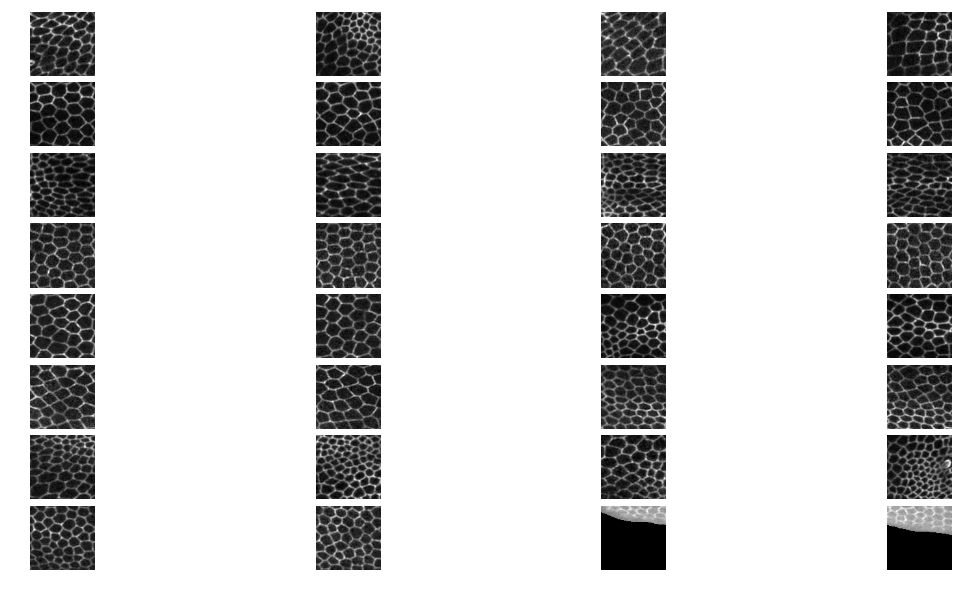

In [10]:
plot_patches(big_patch_set, (8,4))

In [52]:
from itertools import product
def augment_iter(patch, k=8):
    """iterator through the first k elements of the 8th element rotation group of the square"""

    # if patch.shape[-2] != patch.shape[-1]:
    #     raise ValueError("last two dimensions (%s) are not equal!" % str(patches.shape[-2:]))

    if k < 1 or k > 8:
        raise ValueError("invalid k (should be  0< k <=8 )")

    all_patches = []

    for f1, f2 in product([1, -1], repeat=2):
        all_patches.append(patch[..., ::f1, ::f2])

    for i in [1, 3]:
        all_patches.append(np.rot90(patch.T, i).T)

    all_patches.append((np.rot90(patch.T, 1).T)[:, ::-1])
    all_patches.append((np.rot90(patch.T, 1).T)[::-1, :])

    for p in all_patches[:k]:
        yield p

In [71]:
X = np.concatenate([_x  for _x in augment_iter(big_patch_set) ], axis = 0)
Y = np.concatenate([_y  for _y in augment_iter(big_label_set) ], axis = 0)

ind = np.arange(len(X))
np.random.shuffle(ind)
#X = X[ind]
#Y = Y[ind]
X.shape



(288, 100, 100)

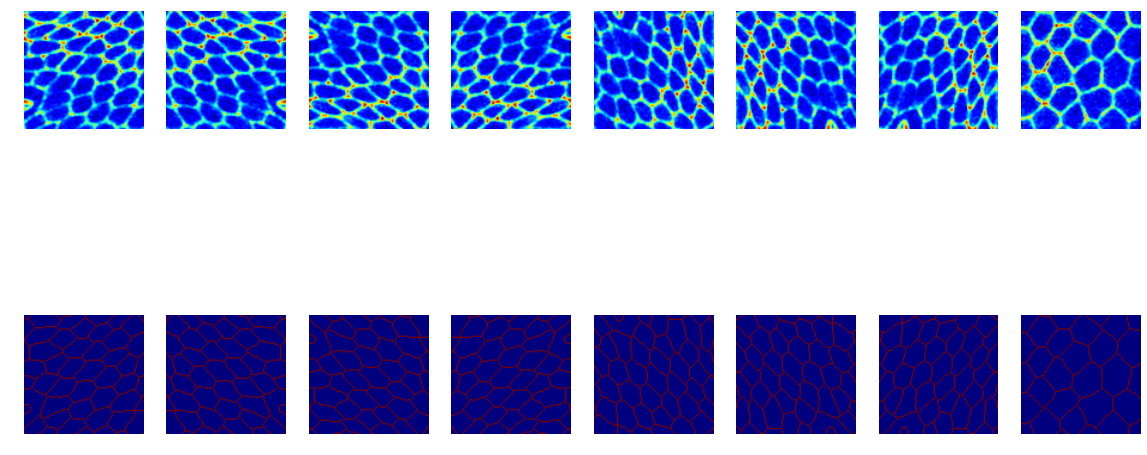

In [73]:
plot_some([X[::36],Y[::36]]);

In [76]:
X = X[...,np.newaxis]
Y = Y[...,np.newaxis]

## building the model

In [77]:
from keras.layers import Dropout, Activation, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, SeparableConv2D
from keras.layers.merge import Concatenate, Add
import keras.backend as K


def conv_block2(n_filter, n1, n2,
                activation="relu",
                border_mode="same",
                dropout=0.0,
                batch_norm=False,
                init="glorot_uniform",
                ):
    def _func(lay):
        s = Conv2D(n_filter, (n1, n2), padding=border_mode, kernel_initializer=init)(lay)
        if batch_norm:
            s = BatchNormalization()(s)
        s = Activation(activation)(s)
        if dropout > 0:
            s = Dropout(dropout)(s)
        return s

    return _func



def unet_block(n_depth=2, n_filter_base=16, n_row=3, n_col=3, n_conv_per_depth=2,
               activation="relu",
               batch_norm=False,
               dropout=0.0,
               last_activation=None):
    """"""

    if last_activation is None:
        last_activation = activation

    if K.image_dim_ordering() == "tf":
        channel_axis = -1
    else:
        channel_axis = 1


    def _func(input):
        skip_layers = []
        layer = input

        # down ...
        for n in range(n_depth):
            for i in range(n_conv_per_depth):
                layer = conv_block2(n_filter_base * 2 ** n, n_row, n_col,
                                    dropout=dropout,
                                    activation=activation,
                                    batch_norm=batch_norm)(layer)
            skip_layers.append(layer)
            layer = MaxPooling2D((2, 2))(layer)


        # middle
        for i in range(n_conv_per_depth - 1):
            layer = conv_block2(n_filter_base * 2 ** n_depth, n_row, n_col,
                                dropout=dropout,
                                activation=activation,
                                batch_norm=batch_norm)(layer)

        layer = conv_block2(n_filter_base * 2 ** (n_depth - 1), n_row, n_col,
                            dropout=dropout,
                            activation=activation,
                            batch_norm=batch_norm)(layer)

        # ...and up with skip layers
        for n in reversed(range(n_depth)):
            layer = Concatenate(axis = channel_axis)([UpSampling2D((2, 2))(layer), skip_layers[n]])
            for i in range(n_conv_per_depth - 1):
                layer = conv_block2(n_filter_base * 2 ** n, n_row, n_col,
                                    dropout=dropout,
                                    activation=activation,
                                    batch_norm=batch_norm)(layer)

            layer = conv_block2(n_filter_base * 2 ** max(0, n - 1), n_row, n_col,
                                dropout=dropout,
                                activation=activation if n > 0 else last_activation,
                                batch_norm=batch_norm)(layer)

        return layer

    return _func


def my_binary_crossentropy(weights =(1., 1.)):
    def _func(y_true, y_pred):
        return -(weights[0] * K.mean((1-y_true)*K.log((1-y_pred)+K.epsilon())) +
                 weights[1] * K.mean(y_true*K.log(y_pred+K.epsilon())))
    return _func

def build_model_unet(input_shape, dropout=.2):
    input = Input(input_shape)

    unet = unet_block(2, 8, 5, 5, activation="relu")(input)
    final = Conv2D(1, (1, 1), activation='sigmoid')(unet)

    model = Model(inputs=input, outputs=final)

    return model


In [78]:
model = build_model_unet(X.shape[1:], dropout = 0.)

model.summary()


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_8 (InputLayer)             (None, 100, 100, 1)   0                                            
____________________________________________________________________________________________________
conv2d_77 (Conv2D)               (None, 100, 100, 8)   208         input_8[0][0]                    
____________________________________________________________________________________________________
activation_71 (Activation)       (None, 100, 100, 8)   0           conv2d_77[0][0]                  
____________________________________________________________________________________________________
conv2d_78 (Conv2D)               (None, 100, 100, 8)   1608        activation_71[0][0]              
___________________________________________________________________________________________

In [84]:
model.compile(optimizer=Adam(lr=0.002), loss=my_binary_crossentropy(weights=(1.,10.)))

In [85]:
model.fit(X,Y, epochs=20, batch_size=16)

Epoch 1/20
288/288 [==============================] - 15s - loss: 0.8789    
Epoch 2/20
288/288 [==============================] - 14s - loss: 0.6017    
Epoch 3/20
288/288 [==============================] - 14s - loss: 0.4904    
Epoch 4/20
288/288 [==============================] - 14s - loss: 0.4198    
Epoch 5/20
288/288 [==============================] - 14s - loss: 0.3804    
Epoch 6/20
288/288 [==============================] - 14s - loss: 0.3591    
Epoch 7/20
288/288 [==============================] - 14s - loss: 0.3521    
Epoch 8/20
288/288 [==============================] - 14s - loss: 0.3352    
Epoch 9/20
288/288 [==============================] - 14s - loss: 0.3288    
Epoch 10/20
288/288 [==============================] - 14s - loss: 0.3173    
Epoch 11/20
288/288 [==============================] - 14s - loss: 0.3097    
Epoch 12/20
288/288 [==============================] - 14s - loss: 0.3090    
Epoch 13/20
288/288 [==============================] - 14s - loss: 0.3072

In [87]:
Y_pred = model.predict(X[:8])

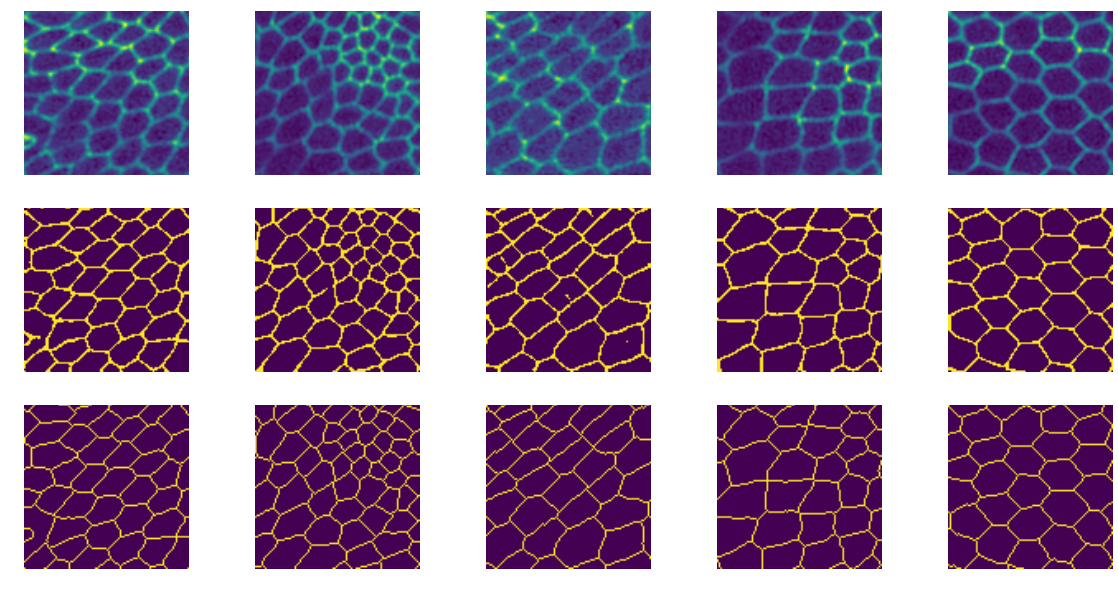

In [90]:
plot_some([X[:5,...,0],Y_pred[:5,...,0]>.7,Y[:5,...,0]], cmap = "viridis")

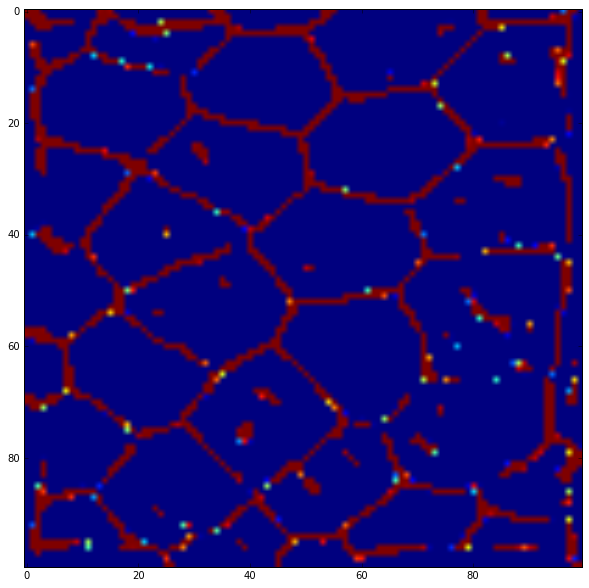

In [97]:
pr = model.predict(p12.reshape(1,100,100,1))
plt.imshow(pr[0,:,:,0])

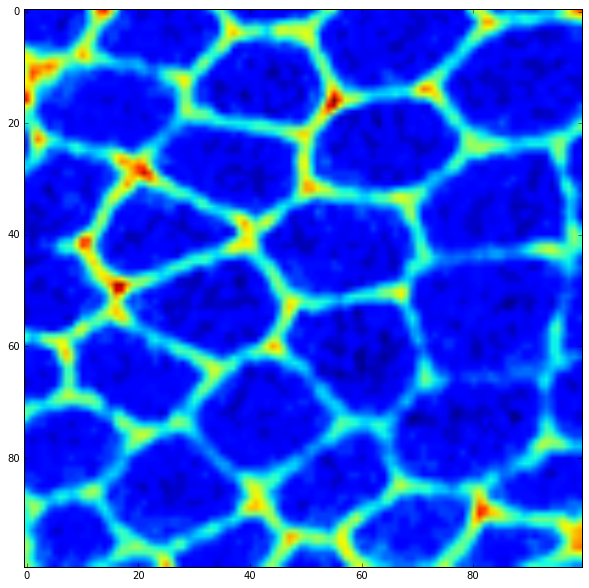

In [98]:
plt.imshow(p12)

In [75]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
x_train.shape

(60000, 28, 28)

In [57]:
nsw = patches_train_normalized.reshape(9,100,100,1)

In [58]:
nsw.shape

(9, 100, 100, 1)

In [100]:
nsw_l_norm.shape

(9, 100, 100, 1)

In [56]:
nsw_l = labels_train.reshape(9,100,100,1)

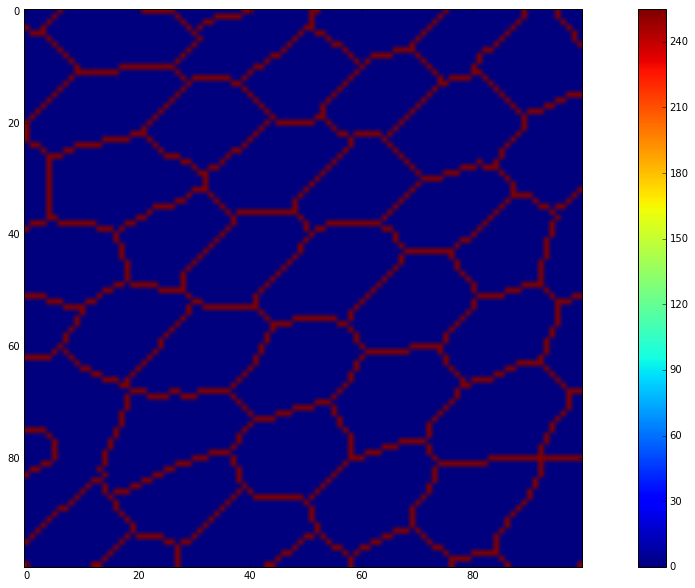

In [251]:
plt.imshow(nsw_l[0,:,:,0])
plt.colorbar()

In [27]:
nsw_l_norm = nsw_l/255

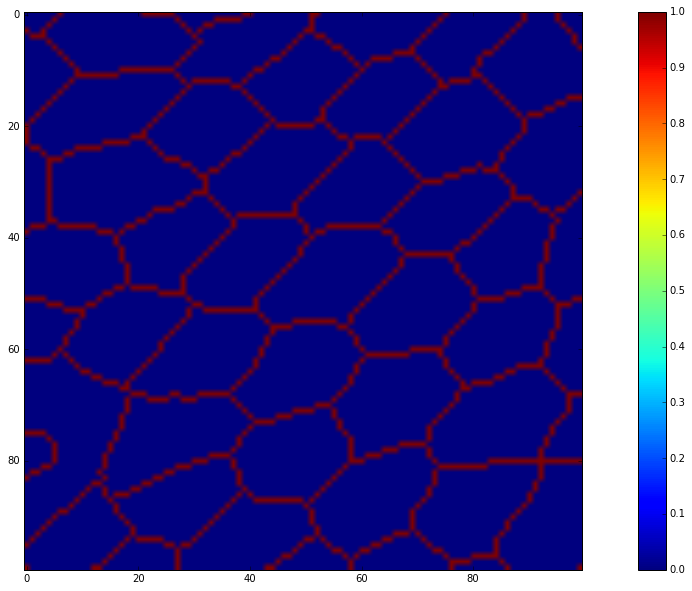

In [28]:
plt.imshow(nsw_l_norm[0,:,:,0]); plt.colorbar()

In [27]:
type(nsw_l[0,1,1,0])

numpy.int64

In [28]:
UpSampling2D(size=(2, 2))()

AttributeError: 'numpy.ndarray' object has no attribute 'get_shape'

numpy.float32

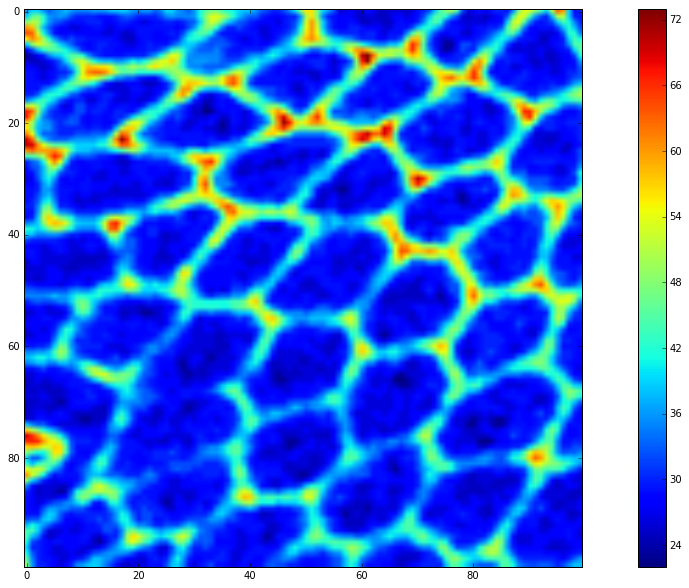

In [316]:
# plt.imshow(x[0,:,:,0]), plt.colorbar()
plt.imshow(p1), plt.colorbar()
x[3,:,:,0].max()

type(x[3,0,0,0])

In [336]:

p1_normalised = (p1-p1.min())*1.0/(p1.max()-p1.min())
p1r = p1_normalised.reshape(1,100,100,1)
p1pr = model.predict(p1r)
p1pr = p1pr[:,:,1].reshape(100,100)

(<matplotlib.image.AxesImage at 0x1316abe10>,
 <matplotlib.colorbar.Colorbar at 0x1250a47d0>)

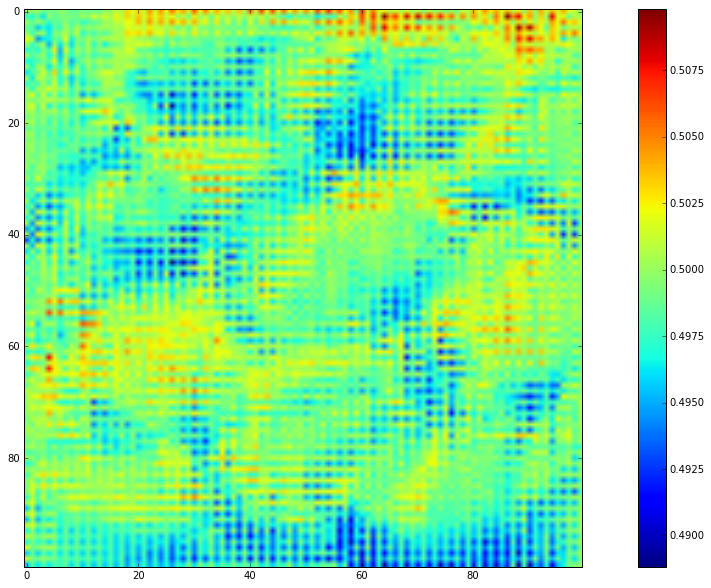

In [337]:
plt.imshow(p1pr), plt.colorbar()

In [254]:
from keras import backend as K
import keras
def my_binary_crossentropy(weights =(1., 1.)):
    def catcross(y_true, y_pred):
        return -(weights[0] * K.mean(y_true[:,:,0]*K.log(y_pred[:,:,0]+K.epsilon())) +
                 weights[1] * K.mean(y_true[:,:,1]*K.log(y_pred[:,:,1]+K.epsilon())))

        # return -(K.mean(y_true[:,:,0]*K.log(y_pred[:,:,0]+K.epsilon()))+K.mean(y_true[:,:,1]*K.log(y_pred[:,:,1]+K.epsilon())))
    return catcross

In [32]:
(la1_sq/255).sum()

1010

In [33]:
1010./10000

0.101

In [40]:
keras.utils.to_categorical([1,0,0,1,0], 2)

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [41]:
catLab = []
for i in range(9):
    catLab.append(keras.utils.to_categorical(nsw_l_norm[i,:,:,0].reshape(100*100,1)))

In [42]:
catlab = np.asarray(catLab)

In [43]:
catlab.shape

(9, 10000, 2)

In [44]:
type(catlab)

numpy.ndarray

In [45]:
catlab

array([[[ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        ..., 
        [ 1.,  0.],
        [ 1.,  0.],
        [ 0.,  1.]],

       [[ 0.,  1.],
        [ 1.,  0.],
        [ 1.,  0.],
        ..., 
        [ 0.,  1.],
        [ 1.,  0.],
        [ 1.,  0.]],

       [[ 0.,  1.],
        [ 1.,  0.],
        [ 0.,  1.],
        ..., 
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.]],

       ..., 
       [[ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        ..., 
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.]],

       [[ 0.,  1.],
        [ 1.,  0.],
        [ 1.,  0.],
        ..., 
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.]],

       [[ 1.,  0.],
        [ 0.,  1.],
        [ 1.,  0.],
        ..., 
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.]]])

In [322]:
catlab.shape

(36, 10000, 2)

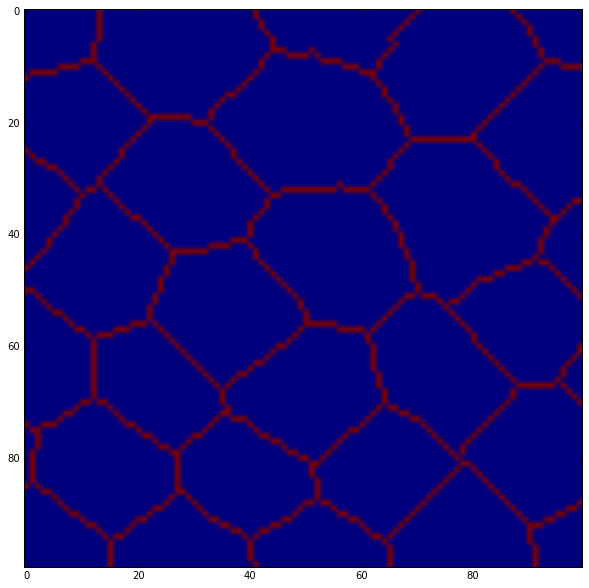

In [328]:
plt.imshow(catlab[35,:,1].reshape(100,100))